In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pd.plotting.register_matplotlib_converters()

In [5]:
GEP1 = pd.read_csv('../data/GEP/Consumption_15min.csv', index_col=0, header=0, names=['value'])
GEP2 = pd.read_csv('../data/GEP/B2_Consumption_15min.csv', index_col=0, header=0, names=['value'])
GEP4 = pd.read_csv('../data/GEP/B4_Consumption_15min.csv', index_col=0, header=0, names=['value'])
Dieteren = pd.read_csv('../data/Dieteren_case/Consumption_15min.csv', index_col=0, header=0, names=['value'])

In [6]:
def dt_index(df):
    df = df.sort_index()
    df.index = pd.to_datetime(df.index)
    return df

In [7]:
GEP1 = dt_index(GEP1)
GEP2 = dt_index(GEP2)
GEP4 = dt_index(GEP4)
Dieteren = dt_index(Dieteren)

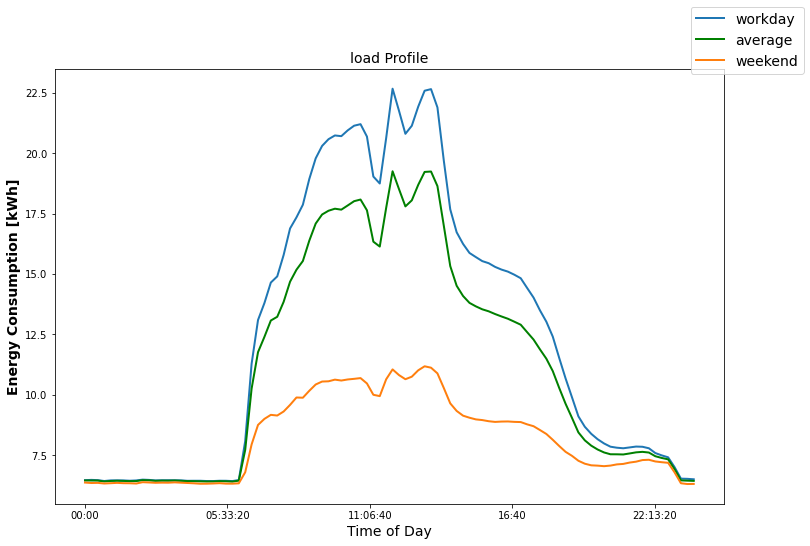

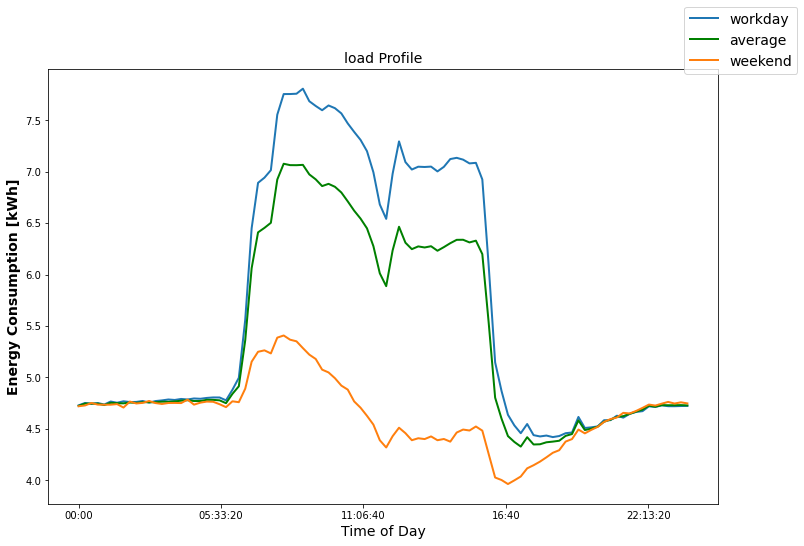

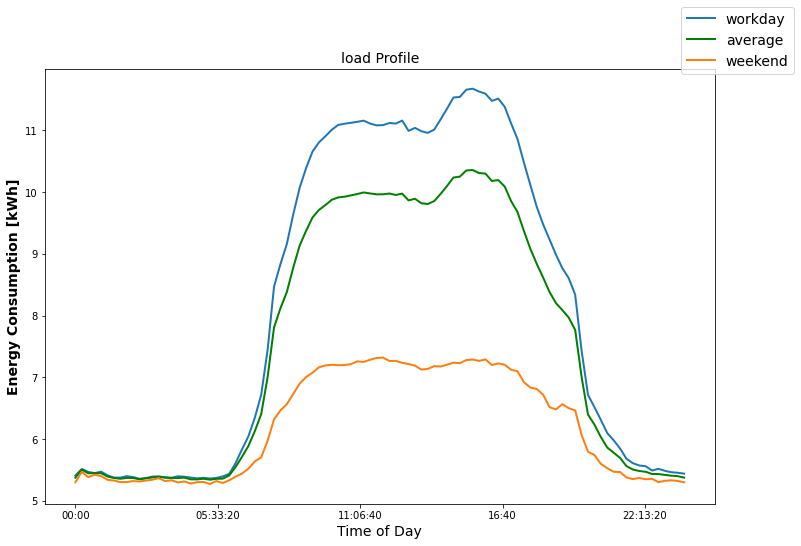

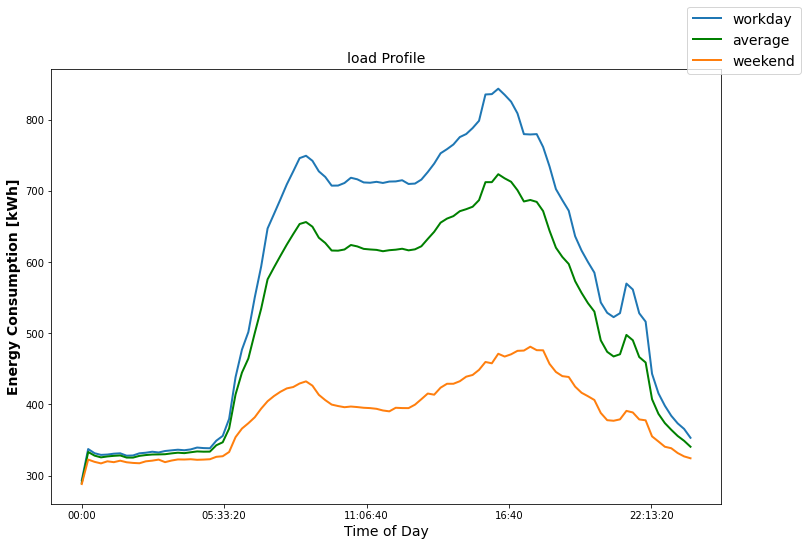

In [45]:
loadprofile(GEP1)
loadprofile(GEP2)
loadprofile(GEP4)
loadprofile(Dieteren)


In [9]:
def daysofweek(df):
    df.index = pd.to_datetime(df.index)
    days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    df['dayofweek'] = df.index.dayofweek
    grouped2 = pd.pivot_table(df, values='value', columns=['dayofweek'], index=df.index)
    grouped2.boxplot()
    ax.set_xticks(np.sort(df['dayofweek'].unique() + 1))
    ax.set_xticklabels(days)
    plt.title('Average Consumption by day of week')
    df.drop('dayofweek', axis=1)
    #plt.show()

In [10]:
def histogram(df):
    plt.hist(df.iloc[:,0], alpha=0.5)
    plt.show()

In [56]:
def plot_weeks(df):
    #list of names for xtick labels. Extra Monday for end.
    weekday_names = "Mon Tue Wed Thu Fri Sat Sun".split(' ')
    fig, ax = plt.subplots()
    years = df.index.year.unique()
    for year in years:
        for name, group in df[str(year)].groupby(df.index.isocalendar().week):
            #print(name, group)
            start_day = group.index.min()
            Xs = group.index - start_day
            #print(Xs.astype('timedelta64[h]'))
            #if (len(Xs) > 168):
            #    continue
            #    print(group)
            Xs = pd.Series(Xs.astype('timedelta64[h]'))
            Ys = group.iloc[:,0]
            if (Xs > 1000).any():
                continue
            plt.rcParams['figure.figsize'] = [14, 9]
            ax.scatter(Xs, Ys)
    #fig.legend()
    plt.title('Weekly trend representation')
    #plt.show()

In [12]:
def acf(dataset):
    plt.rcParams['figure.figsize'] = [14, 9]
    plot_acf(dataset.iloc[:,0], lags=690)
    plt.xticks(fontsize=20, alpha=.7)
    plt.show()

In [13]:
def pacf(dataset):
    plt.rcParams['figure.figsize'] = [14, 9]
    plot_pacf(dataset.iloc[:,0], lags=690)
    plt.xticks(fontsize=20, alpha=.7)
    plt.show()

In [58]:
def loadprofile(data, mode='all'):
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.set_title('load Profile', fontsize=14)
    ax.set_ylabel('Energy Consumption [kWh]', fontsize=14, weight='bold')
    ax.set_xlabel('Time of Day', fontsize=14)
    time = data.iloc[data.index.dayofweek < 4,0].groupby(data[data.index.dayofweek < 4].index.time).mean()
    ax.plot(time.index, time, linewidth=2.0, label='workday')
    time = data.iloc[:,0].groupby(data.index.time).mean()
    ax.plot(time.index, time, 'g', linewidth=2.0, label='average')
    time = data.iloc[data.index.dayofweek > 4,0].groupby(data[data.index.dayofweek > 4].index.time).mean()
    ax.plot(time.index, time, linewidth=2.0, label='weekend')
    fig.legend(fontsize=14)